# Using the techindicators.py functions

This example notebook shows how to import the functions from techindicators.py, carry out calculations with them, and plot the resulting data.  To use this notebook, place this notebook file, example_data.csv file, and technindicators.py file all in the same directory.  Then open the notebook file using the Jupyter client in order to execute and modify the code in the cells below.  This notebook requires that Numpy, Matplotlib, and Datetime modules be installed.

In [1]:
%matplotlib inline
import numpy as np 
from techindicators import * # This line imports all functions from techindicators.py
import matplotlib.pyplot as plt
from datetime import datetime
from mpl_finance import candlestick2_ohlc

## Importing data

The example_data.csv file contains daily trading data for the SPY exchange traded fund.  The 6 columns of data contain the date, open price, high price, low price, closing price, and trading volume, in that order.  Numpy is used to import the data from the csv file.  Individual columns of price and volume data are stored as Numpy arrays containing the numbers as floats.  The date data are stored as a Numpy array in datetime64 format. 

In [2]:
ticker='SPY'
stockdata = np.genfromtxt('example_data.csv', delimiter=',')
sd_open = stockdata[:,1] # Open
sd_high = stockdata[:,2] # High
sd_low = stockdata[:,3] # Low
sd_close = stockdata[:,4] # Close
sd_volume = stockdata[:,5] # Volume
sd_dates = np.loadtxt('example_data.csv', delimiter=',', usecols=(0), dtype='datetime64[D]') # Dates
tradedays = np.arange(len(sd_close)) # Array of number of trading days

## Calculating moving averages

The 50 day simple moving average, 20 day exponential moving average, and 10,2,30 day Kaufman adpative moving average are calculated below.

In [3]:
sma50 = sma(sd_close,50) # calculate 50 day SMA of closing price
ema20 = ema(sd_close,20) # calculate 20 day EMA of closing price
wma50 = wma(sd_close,50) # calculated 50 day WMA of closing price
kama_sd = kama(sd_close,10,2,30) # calculate standard Kaufman adaptive moving average

## Plotting prices and moving averages

The array length of the moving averages depends upon the number of periods used for averaging.  As a result, the x-axis data (in this case the dates) must be truncated to match the y-axis data for each moving average.  Below, Numpy array slicing is used to truncate the date data and the dates are also converted to the datetime data format for matplotlib.  Note that the moving averages do not appear smooth.  This is an artifact of matplotlib placing gaps in the data on dates where there is no trading (weekends and holidays).

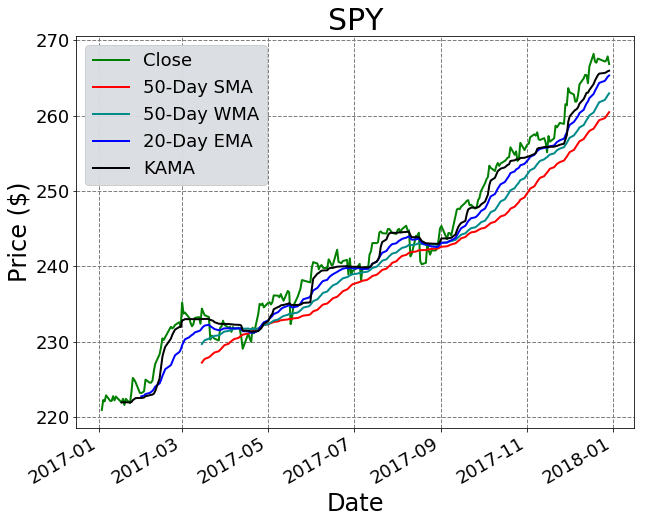

In [4]:
# plot daily closing price of SPY along with 50-day SMA, 20-day EMA, and KAMA
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(sd_dates.astype(datetime),sd_close,color='green',lw=2,label="Close")
ax.plot(sd_dates[len(sd_dates)-len(sma50):].astype(datetime),sma50,color='red',lw=2,label='50-Day SMA')
ax.plot(sd_dates[len(sd_dates)-len(wma50):].astype(datetime),wma50,color='darkcyan',lw=2,label='50-Day WMA')
ax.plot(sd_dates[len(sd_dates)-len(ema20):].astype(datetime),ema20,color='blue',lw=2,label='20-Day EMA')
ax.plot(sd_dates[len(sd_dates)-len(kama_sd):].astype(datetime),kama_sd,color='black',lw=2,label='KAMA')
ax.set_title(ticker,fontsize=30)
ax.set_xlabel('Date',fontsize=24)
ax.set_ylabel('Price ($)',fontsize=24)
ax.legend(loc='best', frameon=True, fancybox=True, framealpha=0.95, fontsize=18, facecolor='#D9DDE1')
fig.autofmt_xdate()
ax.grid(color='gray', linestyle='--', linewidth=1)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.show()

Rather than placing dates on the x-axis, it is possible to create an array containing the trading days of the year numbered in order.  This eliminates the artifacts introduced by matplotlib's handling of weekends and trading holidays.

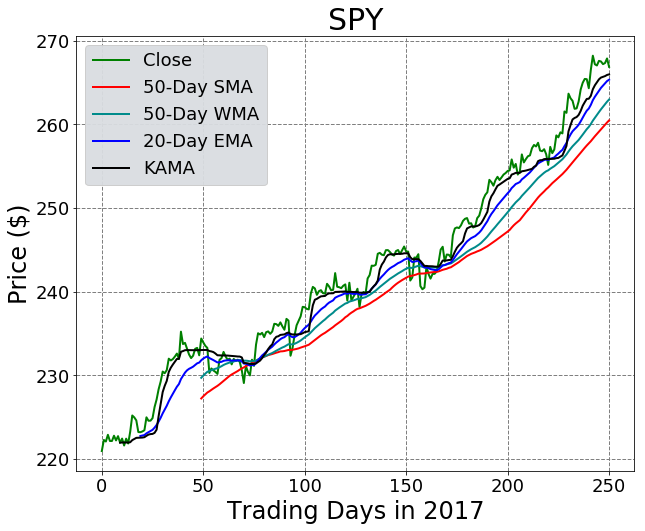

In [5]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(tradedays,sd_close,color='green',lw=2,label="Close")
ax.plot(tradedays[len(sd_dates)-len(sma50):],sma50,color='red',lw=2,label='50-Day SMA')
ax.plot(tradedays[len(sd_dates)-len(wma50):],wma50,color='darkcyan',lw=2,label='50-Day WMA')
ax.plot(tradedays[len(sd_dates)-len(ema20):],ema20,color='blue',lw=2,label='20-Day EMA')
ax.plot(tradedays[len(sd_dates)-len(kama_sd):],kama_sd,color='black',lw=2,label='KAMA')
ax.set_title(ticker,fontsize=30)
ax.set_xlabel('Trading Days in 2017',fontsize=24)
ax.set_ylabel('Price ($)',fontsize=24)
ax.legend(loc='best', frameon=True, fancybox=True, framealpha=0.95, fontsize=18, facecolor='#D9DDE1')
ax.grid(color='gray', linestyle='--', linewidth=1)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.show()

## Calculating and displaying the latest values of technical indicators

Below, the 20-day commodity channel index, 14-day average true range, and 14-day relative strength index are calculated.  The values of these indicators are then printed out for the last trading day of the year.

In [6]:
cci20 = cci(sd_high,sd_low,sd_close,20) # 20-day commodity channel index
atr14 = atr(sd_high,sd_low,sd_close,14) # 14-day average true range
rsi14 = rsi(sd_close,14) # 14-day relative strength index
rstd10 = rstd(sd_close,10) # 10-day rolling standard deviation
roc12 = roc(sd_close,12) # 12-day rate of change
print('Technical indicator values for {} on {}:'.format(ticker,sd_dates[-1]))
print('')
print('The 20-day CCI was {:.2f}.'.format(cci20[-1]))
print('The 14-day ATR was {:.2f}.'.format(atr14[-1]))
print('The 14-day RSI was {:.2f}.'.format(rsi14[-1]))
print('The 10-day rolling standard deviation was {:.2f}.'.format(rstd10[-1]))
print('The 12-day rate of change was {:.2f}.'.format(roc12[-1]))

Technical indicator values for SPY on 2017-12-29:

The 20-day CCI was 63.75.
The 14-day ATR was 1.43.
The 14-day RSI was 63.92.
The 10-day rolling standard deviation was 0.47.
The 12-day rate of change was 0.54.


## Plotting the Accumulation/Distribution Line

For the Accumulation/Distribution line, the absolute values of ADL do not matter as much as the trend.  To just show the trend, the ADL is plotted without y-axis ticks and labels.

In [7]:
adl_sd = adl(sd_high,sd_low,sd_close,sd_volume) # Accumulation/Distribution line

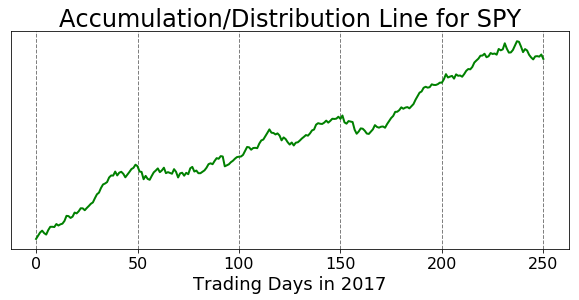

In [8]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(tradedays,adl_sd,color='green',lw=2)
ax.set_title('Accumulation/Distribution Line for %s' % ticker,fontsize=24)
ax.set_yticks([])
ax.set_xlabel('Trading Days in 2017',fontsize=18)
ax.set_ylabel('',fontsize=18)
ax.grid(color='gray', linestyle='--', linewidth=1)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.show()

## MACD Calculations and Plotting

The code below calculates the Moving Average Convergence/Divergence using the standard number of periods for averaging of 12, 26, and 9 for the fast EMA, slow EMA, and Signal Line, respectively.  The MACD Line and Signal Line are then plotted.

In [9]:
macd_line_sd = macd(sd_close,12,26,9)[0]
macd_signal_sd = macd(sd_close,12,26,9)[1]
macd_histogram_sd = macd_line_sd[len(macd_line_sd)-len(macd_signal_sd):]-macd_signal_sd

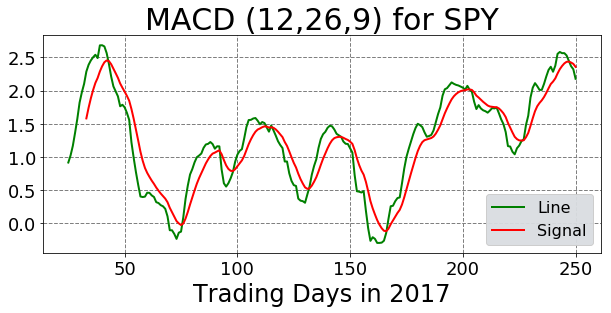

In [10]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(tradedays[len(tradedays)-len(macd_line_sd):],macd_line_sd,color='green',lw=2,label="Line")
ax.plot(tradedays[len(tradedays)-len(macd_signal_sd):],macd_signal_sd,color='red',lw=2,label="Signal")
ax.set_title('MACD (12,26,9) for %s' % ticker,fontsize=30)
ax.set_xlabel('Trading Days in 2017',fontsize=24)
ax.set_ylabel('',fontsize=24)
ax.legend(loc='best', frameon=True, fancybox=True, framealpha=0.95, fontsize=16, facecolor='#D9DDE1')
ax.grid(color='gray', linestyle='--', linewidth=1)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.show()

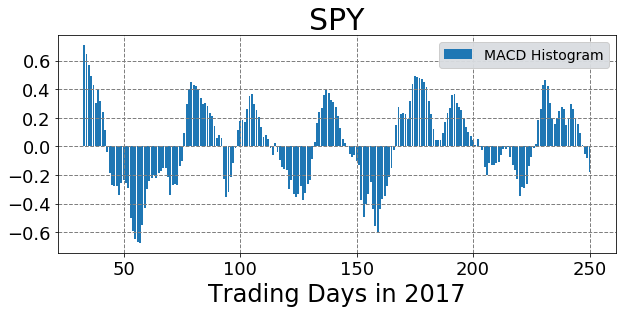

In [11]:
fig, ax = plt.subplots(figsize=(10,4))
ax.bar(tradedays[len(tradedays)-len(macd_histogram_sd):],macd_histogram_sd,label="MACD Histogram")
ax.set_title(ticker,fontsize=30)
ax.set_xlabel('Trading Days in 2017',fontsize=24)
ax.set_ylabel('',fontsize=24)
ax.legend(loc='best', frameon=True, fancybox=True, framealpha=0.95, fontsize=14, facecolor='#D9DDE1')
ax.grid(color='gray', linestyle='--', linewidth=1)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.show()

## PPO Calculations and Plotting

The percentage price oscillator is an analog of the MACD.  The difference is that the MACD is an absolute difference between two moving averages, while for the PPO it is a difference relative to the value of the slower moving average. By focusing on percent differences relative to the slower moving average, the values of the PPO line do not depend on the price, but on changes in price. Therefore the PPO can be used over long time frames in which the price may have changed significantly, or to compare different equities that have very different prices.  The calculation and plotting of PPO is the same as with the MACD.

In [12]:
ppo_line_sd = ppo(sd_close,12,26,9)[0]
ppo_signal_sd = ppo(sd_close,12,26,9)[1]
ppo_histogram_sd = ppo_line_sd[len(ppo_line_sd)-len(ppo_signal_sd):]-ppo_signal_sd

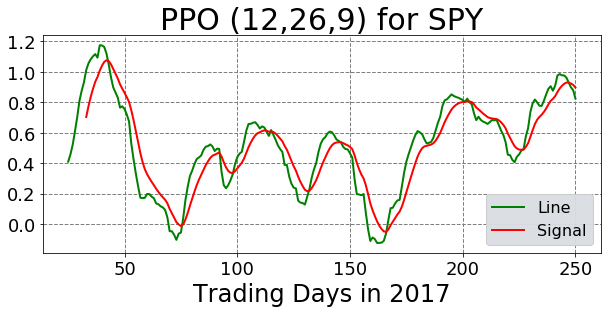

In [13]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(tradedays[len(tradedays)-len(ppo_line_sd):],ppo_line_sd,color='green',lw=2,label="Line")
ax.plot(tradedays[len(tradedays)-len(ppo_signal_sd):],ppo_signal_sd,color='red',lw=2,label="Signal")
ax.set_title('PPO (12,26,9) for %s' % ticker,fontsize=30)
ax.set_xlabel('Trading Days in 2017',fontsize=24)
ax.set_ylabel('',fontsize=24)
ax.legend(loc='best', frameon=True, fancybox=True, framealpha=0.95, fontsize=16, facecolor='#D9DDE1')
ax.grid(color='gray', linestyle='--', linewidth=1)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.show()

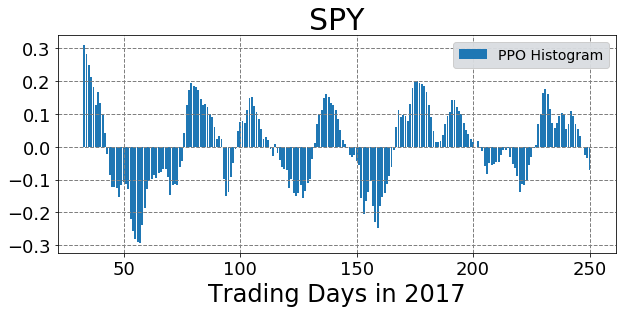

In [14]:
fig, ax = plt.subplots(figsize=(10,4))
ax.bar(tradedays[len(tradedays)-len(ppo_histogram_sd):],ppo_histogram_sd,label="PPO Histogram")
ax.set_title(ticker,fontsize=30)
ax.set_xlabel('Trading Days in 2017',fontsize=24)
ax.set_ylabel('',fontsize=24)
ax.legend(loc='best', frameon=True, fancybox=True, framealpha=0.95, fontsize=14, facecolor='#D9DDE1')
ax.grid(color='gray', linestyle='--', linewidth=1)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.show()

## TRIX Calculations and Plotting

The TRIX indicator line is a percentage change in a triple EMA smoothed price series.  The signal is an EMA of the TRIX line.  The trix function requires a price series, a number of periods for each EMA used in calculating the line, and a number of periods used in the calculation of the signal.  The standard parameters are 15 periods for the line calculation, and 9 periods for the signal.  The TRIX(15,9) indicators is very similar to MACD(12,26,9)

In [15]:
trix_line_sd = trix(sd_close,15,9)[0]
trix_signal_sd = trix(sd_close,15,9)[1]

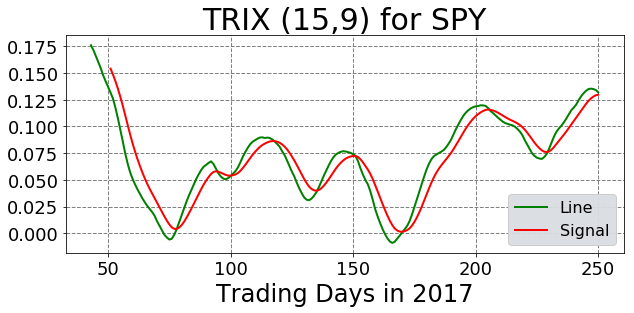

In [16]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(tradedays[len(tradedays)-len(trix_line_sd):],trix_line_sd,color='green',lw=2,label="Line")
ax.plot(tradedays[len(tradedays)-len(trix_signal_sd):],trix_signal_sd,color='red',lw=2,label="Signal")
ax.set_title('TRIX (15,9) for %s' % ticker,fontsize=30)
ax.set_xlabel('Trading Days in 2017',fontsize=24)
ax.set_ylabel('',fontsize=24)
ax.legend(loc='best', frameon=True, fancybox=True, framealpha=0.95, fontsize=16, facecolor='#D9DDE1')
ax.grid(color='gray', linestyle='--', linewidth=1)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.show()

## Calculating and Plotting Keltner Channels

The Keltner channels consist of a center line that is an exponential moving average (typically of the closing price), and upper and lower lines that are formed by adding and subtracting, respectively, a multiple of the average true range.  There are three adjustable parameters: the number of periods used to calculate the center line EMA, the multiple used for the ATR, and the number of periods used to calculate the ATR.  The standard Keltner channel uses the parameters, 20 for the periods used in calculating the EMA, 2 as the multiple of ATR, and 10 as the number of periods used in calculating ATR.  Keltner channels are best visualized on a candlestick chart, as shown below.

In [17]:
kelt_sd = kelt(sd_high,sd_low,sd_close,20,2.0,10) # Kelter Channel calculated with standard parameters
lowl = kelt_sd[0] # lower line
cenl = kelt_sd[1] # center line
uppl = kelt_sd[2] # upper line

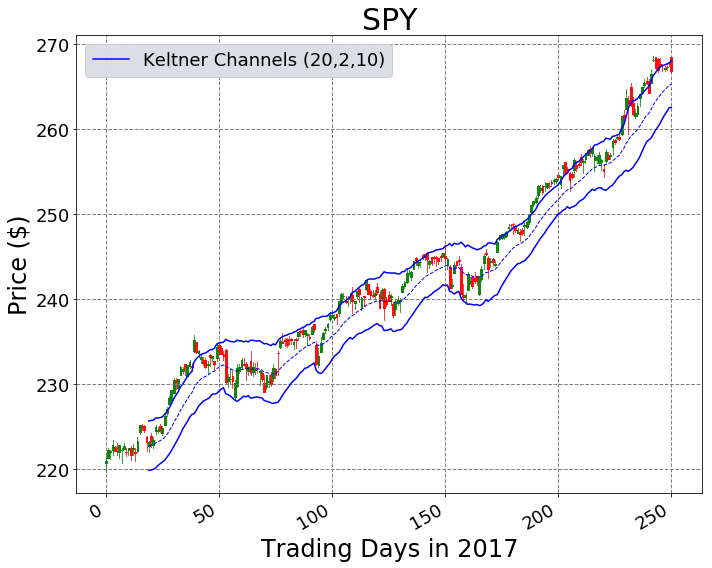

In [18]:
fig, ax = plt.subplots(figsize=(10,8))
ax.set_ylabel('Price ($)')
ax.set_xlabel('Date')
candlestick2_ohlc(ax,sd_open,sd_high,sd_low,sd_close,width=0.8,colorup='g',colordown='r',alpha=0.75)
ax.plot(tradedays[len(sd_dates)-len(lowl):],lowl,color='blue',lw=1.5,label='Keltner Channels (20,2,10)')
ax.plot(tradedays[len(sd_dates)-len(uppl):],uppl,color='blue',lw=1.5,label='')
ax.plot(tradedays[len(sd_dates)-len(cenl):],cenl,color='blue',lw=1.0,linestyle='--',label='')
ax.set_title(ticker,fontsize=30)
ax.set_xlabel('Trading Days in 2017',fontsize=24)
ax.set_ylabel('Price ($)',fontsize=24)
ax.legend(loc='upper left', frameon=True, fancybox=True, framealpha=0.95, fontsize=18, facecolor='#D9DDE1')
ax.grid(color='gray', linestyle='--', linewidth=1)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
fig.autofmt_xdate()
fig.tight_layout()
plt.show()

## Calculating and Plotting Bollinger Bands<html>&reg;</html>

The Bollinger Bands<html>&reg;</html> consist of a center line that is an simple moving average (typically of the closing price), and upper and lower lines that are formed by adding and subtracting, respectively, a multiple of the rolling standard deviation.  There are three adjustable parameters: the number of periods used to calculate the center line SMA, the multiple used for the standard deviation, and the number of periods used to calculate the standard deviation.  The standard Bollinger Bands<html>&reg;</html> uses the parameters: 20 for the periods used in calculating the EMA, 2 as the multiple of standard deviation, and 20 as the number of periods used in calculating standard deviation.  Bollinger Bands<html>&reg;</html> are best visualized on a candlestick chart, as shown below.

In [19]:
boll_sd = boll(sd_close,20,2.0,20) # Bollinger Bands calculated with standard parameters
lowlb = boll_sd[0] # lower line
cenlb = boll_sd[1] # center line
upplb = boll_sd[2] # upper line

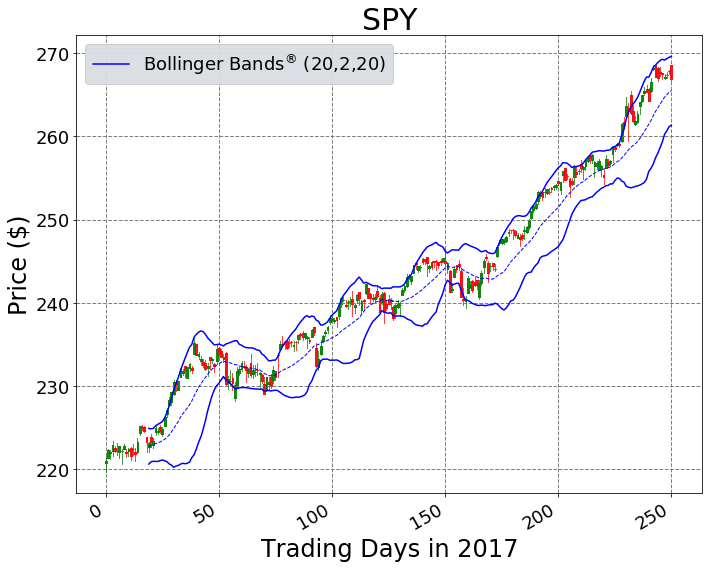

In [20]:
fig, ax = plt.subplots(figsize=(10,8))
ax.set_ylabel('Price ($)')
ax.set_xlabel('Date')
candlestick2_ohlc(ax,sd_open,sd_high,sd_low,sd_close,width=0.8,colorup='g',colordown='r',alpha=0.75)
ax.plot(tradedays[len(sd_dates)-len(lowlb):],lowlb,color='blue',lw=1.5,label='Bollinger Bands$^\circledR$ (20,2,20)')
ax.plot(tradedays[len(sd_dates)-len(upplb):],upplb,color='blue',lw=1.5,label='')
ax.plot(tradedays[len(sd_dates)-len(cenlb):],cenlb,color='blue',lw=1.0,linestyle='--',label='')
ax.set_title(ticker,fontsize=30)
ax.set_xlabel('Trading Days in 2017',fontsize=24)
ax.set_ylabel('Price ($)',fontsize=24)
ax.legend(loc='upper left', frameon=True, fancybox=True, framealpha=0.95, fontsize=18, facecolor='#D9DDE1')
ax.grid(color='gray', linestyle='--', linewidth=1)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
fig.autofmt_xdate()
fig.tight_layout()
plt.show()

## Stochastic Oscillator

The stochastic oscillator function require 6 parameters: high, low, and close prices, a look back period, a number of periods for the %K simple moving average, and a number of periods for the %D simple moving average.  The standard look back period is 14.  Shown below is the calculation and plotting of the stochastic oscillator with a 14 period look back, 3 period SMA for %K, and 3 period SMA for %D.  These parameters (14,3,3) calculate the standard slow stochastic oscillator.  Using parameters of 14,1,3 would calculate the standard fast stochastic oscillator.  The stoch function can be adjusted to other look back and moving average periods.

In [21]:
stoch_sd = stoch(sd_high,sd_low,sd_close,14,3,3) # Full stochastics calculated with standard parameters
stoch_k = stoch_sd[0] # %K parameter
stoch_d = stoch_sd[1] # %D parameter

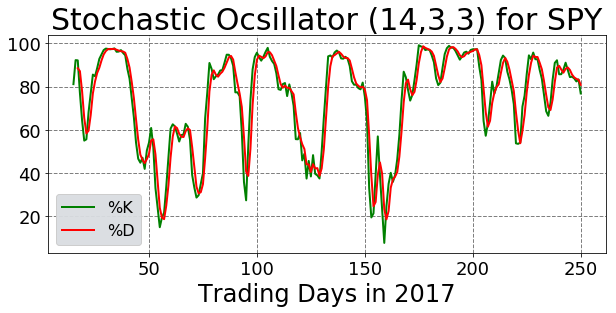

In [22]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(tradedays[len(tradedays)-len(stoch_k):],stoch_k,color='green',lw=2,label="%K")
ax.plot(tradedays[len(tradedays)-len(stoch_d):],stoch_d,color='red',lw=2,label="%D")
ax.set_title('Stochastic Ocsillator (14,3,3) for %s' % ticker,fontsize=30)
ax.set_xlabel('Trading Days in 2017',fontsize=24)
ax.set_ylabel('',fontsize=24)
ax.legend(loc='best', frameon=True, fancybox=True, framealpha=0.95, fontsize=16, facecolor='#D9DDE1')
ax.grid(color='gray', linestyle='--', linewidth=1)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.show()

## Vortex Indicator Calculation and Plot

The vortex function requires four parameters: high, low, close, and number of periods for calculation.  The standard number of periods is 14.  The function returns the Vortex positive indicator and negative indicator.  The positive and negative indicators are plotted.  Trade signals are generated by crossovers of the two indicators, or threshold values of the indicators.

In [23]:
vort_sd = vortex(sd_high,sd_low,sd_close,14)
vort_p_sd = vort_sd[0]
vort_n_sd = vort_sd[1]

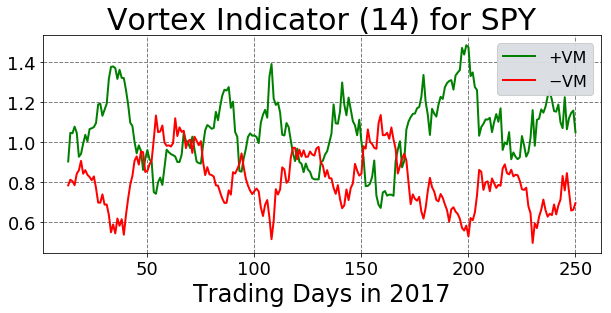

In [24]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(tradedays[len(tradedays)-len(vort_p_sd):],vort_p_sd,color='green',lw=2,label="+VM")
ax.plot(tradedays[len(tradedays)-len(vort_n_sd):],vort_n_sd,color='red',lw=2,label="$-$VM")
ax.set_title('Vortex Indicator (14) for %s' % ticker,fontsize=30)
ax.set_xlabel('Trading Days in 2017',fontsize=24)
ax.set_ylabel('',fontsize=24)
ax.legend(loc='best', frameon=True, fancybox=True, framealpha=0.95, fontsize=16, facecolor='#D9DDE1')
ax.grid(color='gray', linestyle='--', linewidth=1)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.show()

## ADX Calculation and Plotting

The adx function calculates the Average Directional Index (ADX), an indicator used to determine if a stock price is trending or not.  The function requires four parameters: the high prices, low prices, closing prices, and number of periods used for calculation.  The function returns the positive directional indicator (+DI), negative directional indicator (-DI), and ADX.

In [25]:
adx_sd = adx(sd_high,sd_low,sd_close,14)
adx_pdm = adx_sd[0]
adx_ndm = adx_sd[1]
adx_line = adx_sd[2]

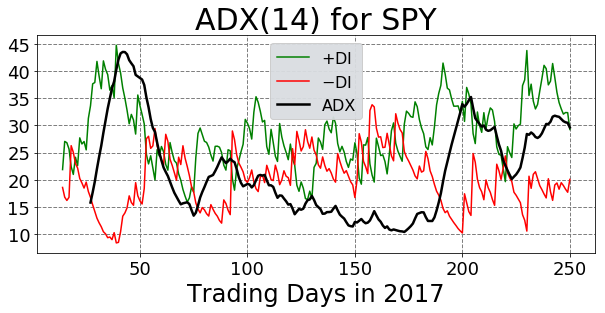

In [26]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(tradedays[len(tradedays)-len(adx_pdm):],adx_pdm,color='green',lw=1.5,label="$+$DI")
ax.plot(tradedays[len(tradedays)-len(adx_ndm):],adx_ndm,color='red',lw=1.5,label="$-$DI")
ax.plot(tradedays[len(tradedays)-len(adx_line):],adx_line,color='black',lw=2.5,label="ADX")
ax.set_title('ADX(14) for %s' % ticker,fontsize=30)
ax.set_xlabel('Trading Days in 2017',fontsize=24)
ax.set_ylabel('',fontsize=24)
ax.legend(loc='best', frameon=True, fancybox=True, framealpha=0.95, fontsize=16, facecolor='#D9DDE1')
ax.grid(color='gray', linestyle='--', linewidth=1)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.show()

## Aroon Indicator and Oscillator

The aroon function calculates the Up Aroon indicator, Down Aroon indicator, and the Aroon Oscillator.  The Aroon indicators and oscillator are used to determine if a change in trend has occurred. The aroon function requires three parameters: high prices, low prices, and a number of periods used for calculation.  The function returns Up, Down, and Oscillator values as Numpy arrays.

In [27]:
aroon_sd = aroon(sd_high,sd_low,25)
aroon_up = aroon_sd[0]
aroon_down = aroon_sd[1]
aroon_osc = aroon_sd[2]

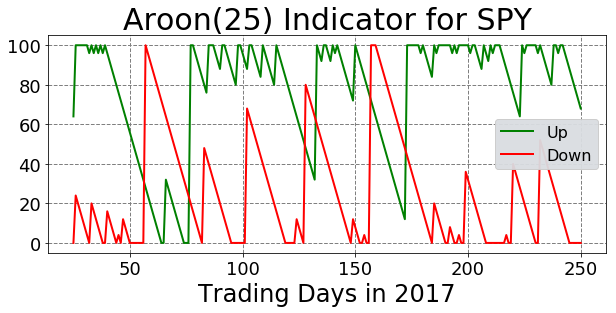

In [28]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(tradedays[len(tradedays)-len(aroon_up):],aroon_up,color='green',lw=2,label="Up")
ax.plot(tradedays[len(tradedays)-len(aroon_down):],aroon_down,color='red',lw=2,label="Down")
ax.set_title('Aroon(25) Indicator for %s' % ticker,fontsize=30)
ax.set_xlabel('Trading Days in 2017',fontsize=24)
ax.set_ylabel('',fontsize=24)
ax.legend(loc='best', frameon=True, fancybox=True, framealpha=0.95, fontsize=16, facecolor='#D9DDE1')
ax.grid(color='gray', linestyle='--', linewidth=1)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.show()

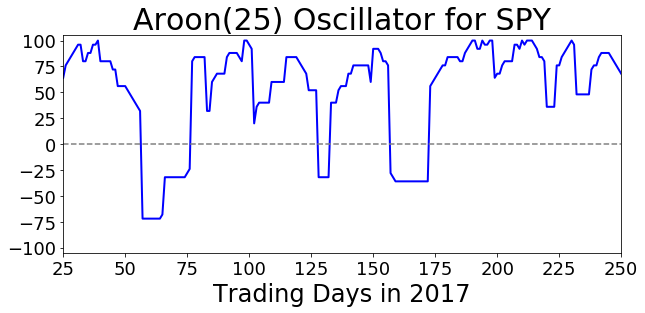

In [29]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(tradedays[len(tradedays)-len(aroon_osc):],aroon_osc,color='blue',lw=2)
ax.plot(tradedays[len(tradedays)-len(aroon_osc):],np.zeros(len(aroon_osc)),color='gray',linestyle='dashed')
ax.set_title('Aroon(25) Oscillator for %s' % ticker,fontsize=30)
ax.set_xlabel('Trading Days in 2017',fontsize=24)
ax.set_ylabel('',fontsize=24)
plt.ylim(-105,105)
plt.xlim(np.amin(tradedays[len(tradedays)-len(aroon_osc):]),np.amax(tradedays[len(tradedays)-len(aroon_osc):]))
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.show()

## Chandelier Exits

The Chandelier Exit is a trailing stop loss price calculated based on a multiple of the ATR. The chand function calculates the Chandelier exit for either a long position or short position.  The function requires high, low, and close prices in order to calculate the ATR, a number of periods to be used for calculation, the ATR multiple to be used, and a string of either 'long' or 'short' to indicate which type of trailing stop loss to calculate.  In the example below, the Chandelier exit is calculated for both long and short position using 22 periods, and an ATR multiple of 3.

In [30]:
chand_long = chand(sd_high,sd_low,sd_close,22,3,'long')
chand_short = chand(sd_high,sd_low,sd_close,22,3,'short')

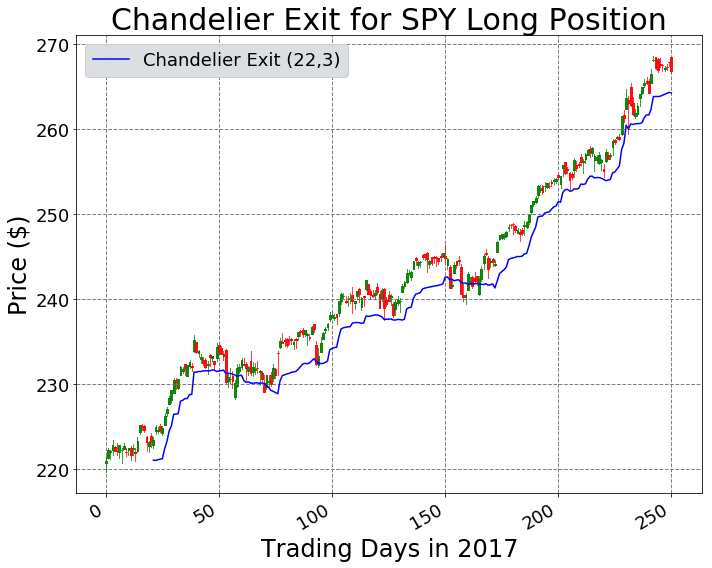

In [31]:
fig, ax = plt.subplots(figsize=(10,8))
ax.set_ylabel('Price ($)')
ax.set_xlabel('Date')
candlestick2_ohlc(ax,sd_open,sd_high,sd_low,sd_close,width=0.8,colorup='g',colordown='r',alpha=0.75)
ax.plot(tradedays[len(sd_dates)-len(chand_long):],chand_long,color='blue',lw=1.5,label='Chandelier Exit (22,3)')
ax.set_title('Chandelier Exit for %s Long Position' % ticker,fontsize=30)
ax.set_xlabel('Trading Days in 2017',fontsize=24)
ax.set_ylabel('Price ($)',fontsize=24)
ax.legend(loc='upper left', frameon=True, fancybox=True, framealpha=0.95, fontsize=18, facecolor='#D9DDE1')
ax.grid(color='gray', linestyle='--', linewidth=1)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
fig.autofmt_xdate()
fig.tight_layout()
plt.show()

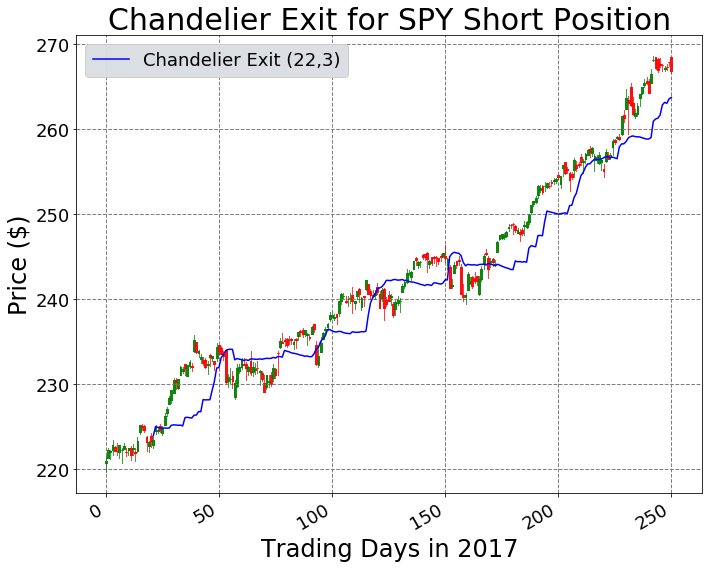

In [32]:
fig, ax = plt.subplots(figsize=(10,8))
ax.set_ylabel('Price ($)')
ax.set_xlabel('Date')
candlestick2_ohlc(ax,sd_open,sd_high,sd_low,sd_close,width=0.8,colorup='g',colordown='r',alpha=0.75)
ax.plot(tradedays[len(sd_dates)-len(chand_short):],chand_short,color='blue',lw=1.5,label='Chandelier Exit (22,3)')
ax.set_title('Chandelier Exit for %s Short Position' % ticker,fontsize=30)
ax.set_xlabel('Trading Days in 2017',fontsize=24)
ax.set_ylabel('Price ($)',fontsize=24)
ax.legend(loc='upper left', frameon=True, fancybox=True, framealpha=0.95, fontsize=18, facecolor='#D9DDE1')
ax.grid(color='gray', linestyle='--', linewidth=1)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
fig.autofmt_xdate()
fig.tight_layout()
plt.show()

## Coppock Curve

The Coppock curve is a weighted moving average (WMA) of the sum of two rates of change (ROC) that have different number of periods used for calculation.  The standard shorter ROC uses 11 periods, the standard longer ROC uses 14 periods.  These two rates of change are summed and a WMA of the sum is calculated.  The standard number of periods for the WMA is 10.  The copp function calculates the Coppock curve given four parameters: an array of prices, number of periods for long ROC, number of periods for short ROC, and number of periods for the WMA.  The standard Coppock Curve is calculated and plotted below. 

In [33]:
copp_sd = copp(sd_close,14,11,10)

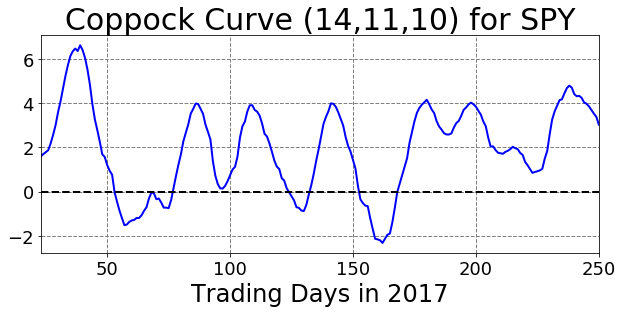

In [34]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(tradedays[len(tradedays)-len(copp_sd):],copp_sd,color='blue',lw=2)
ax.plot(tradedays[len(tradedays)-len(copp_sd):],np.zeros(len(copp_sd)),color='black',linestyle='dashed',lw=2)
ax.set_title('Coppock Curve (14,11,10) for %s' % ticker,fontsize=30)
ax.set_xlabel('Trading Days in 2017',fontsize=24)
ax.set_ylabel('',fontsize=24)
ax.grid(color='gray', linestyle='--', linewidth=1)
plt.xlim(np.amin(tradedays[len(tradedays)-len(copp_sd):]),np.amax(tradedays[len(tradedays)-len(copp_sd):]))
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.show()

## Force Index

The Force Index is an exponential moving average of the product of trading volume and the difference between closing price and the closing price from the previous period.  The force function requires three parameters: an array of closing prices, an array of trading volumes, and a number of periods.  The force function returns the Force Index.

In [35]:
force_sd = force(sd_close,sd_volume,13)

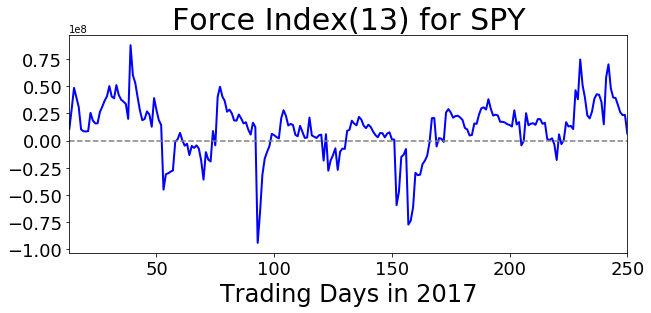

In [36]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(tradedays[len(tradedays)-len(force_sd):],force_sd,color='blue',lw=2)
ax.plot(tradedays[len(tradedays)-len(force_sd):],np.zeros(len(force_sd)),color='gray',linestyle='dashed')
ax.set_title('Force Index(13) for %s' % ticker,fontsize=30)
ax.set_xlabel('Trading Days in 2017',fontsize=24)
ax.set_ylabel('',fontsize=24)
plt.xlim(np.amin(tradedays[len(tradedays)-len(force_sd):]),np.amax(tradedays[len(tradedays)-len(force_sd):]))
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.show()

## Chaikin Money Flow

The Chaikin Money Flow is calculated using the cmf function.  The function requires five parameters: high prices, low prices, closing prices, volume, and a number of periods.  The standard number of periods is 20.  The cmf function returns the Chaikin Money Flow as an array that is plotted below.

In [37]:
cmf_sd = cmf(sd_high,sd_low,sd_close,sd_volume,20)

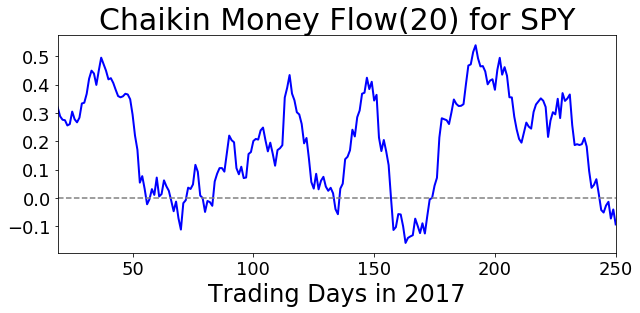

In [38]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(tradedays[len(tradedays)-len(cmf_sd):],cmf_sd,color='blue',lw=2)
ax.plot(tradedays[len(tradedays)-len(cmf_sd):],np.zeros(len(cmf_sd)),color='gray',linestyle='dashed')
ax.set_title('Chaikin Money Flow(20) for %s' % ticker,fontsize=30)
ax.set_xlabel('Trading Days in 2017',fontsize=24)
ax.set_ylabel('',fontsize=24)
plt.xlim(np.amin(tradedays[len(tradedays)-len(cmf_sd):]),np.amax(tradedays[len(tradedays)-len(cmf_sd):]))
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.show()

## Chaikin Oscillator

The Chaikin Oscillator is the difference between two exponential moving averages of the accumulation/distribution line.  The default is to use a 3 period and a 10 period exponential moving average.  The chosc function calculates the Chaikin oscillator given parameters of: high prices, low prices, closing prices, volume, number of period for shorter EMA, and number of periods for longer EMA.

In [39]:
chosc_sd = chosc(sd_high,sd_low,sd_close,sd_volume,3,10)

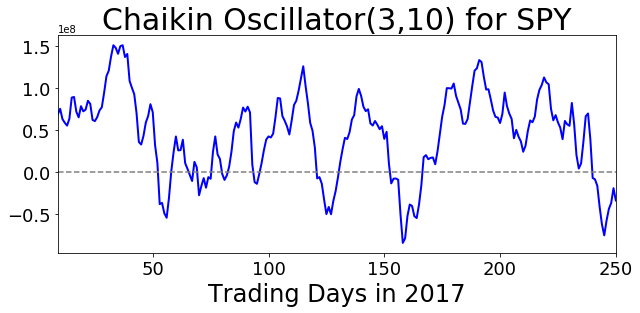

In [40]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(tradedays[len(tradedays)-len(chosc_sd):],chosc_sd,color='blue',lw=2)
ax.plot(tradedays[len(tradedays)-len(chosc_sd):],np.zeros(len(chosc_sd)),color='gray',linestyle='dashed')
ax.set_title('Chaikin Oscillator(3,10) for %s' % ticker,fontsize=30)
ax.set_xlabel('Trading Days in 2017',fontsize=24)
ax.set_ylabel('',fontsize=24)
plt.xlim(np.amin(tradedays[len(tradedays)-len(chosc_sd):]),np.amax(tradedays[len(tradedays)-len(chosc_sd):]))
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.show()

## Ease of Movement (EMV)

The ease of movement is an oscillator that combines price and volume.  The emv function calculates the ease of movement given the four parameters of high prices, low prices, volume, and a number of periods.  The standard number of periods for calculation is 14, but that may be adjusted as desired.

In [41]:
emv_sd = emv(sd_high,sd_low,sd_volume,14)

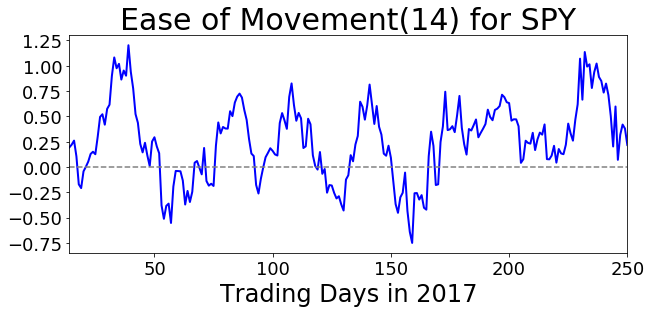

In [42]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(tradedays[len(tradedays)-len(emv_sd):],emv_sd,color='blue',lw=2)
ax.plot(tradedays[len(tradedays)-len(emv_sd):],np.zeros(len(emv_sd)),color='gray',linestyle='dashed')
ax.set_title('Ease of Movement(14) for %s' % ticker,fontsize=30)
ax.set_xlabel('Trading Days in 2017',fontsize=24)
ax.set_ylabel('',fontsize=24)
plt.xlim(np.amin(tradedays[len(tradedays)-len(emv_sd):]),np.amax(tradedays[len(tradedays)-len(emv_sd):]))
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.show()

## Mass Index

The Mass Index is a measure of volatility based on exponential smoothing of the difference between the high and low price for each period.  When the mass index is high, there is an increased likelihood of a trend reversal.  The mindx function calculates the mass index given high prices, low prices, and a number of periods.  The standard number of periods is 25.  The standard signal level is a mass index 27, so that values above 27 indicate a chance for trend reversal.

In [43]:
mindx_sd = mindx(sd_high,sd_low,25)

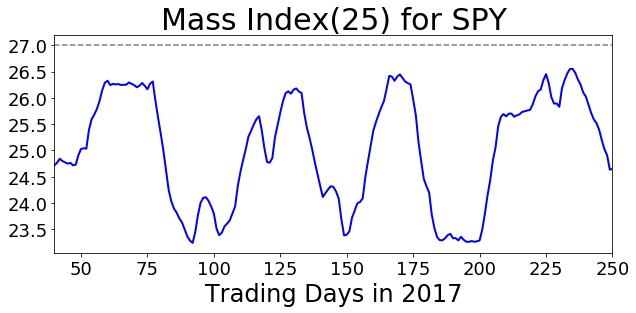

In [44]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(tradedays[len(tradedays)-len(mindx_sd):],mindx_sd,color='blue',lw=2)
ax.plot(tradedays[len(tradedays)-len(mindx_sd):],np.zeros(len(mindx_sd))+27,color='gray',linestyle='dashed')
ax.set_title('Mass Index(25) for %s' % ticker,fontsize=30)
ax.set_xlabel('Trading Days in 2017',fontsize=24)
ax.set_ylabel('',fontsize=24)
plt.xlim(np.amin(tradedays[len(tradedays)-len(mindx_sd):]),np.amax(tradedays[len(tradedays)-len(mindx_sd):]))
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.show()

## Money Flow Index (MFI)

The MFI (also called volume weighted RSI), is an oscillator that uses the typical price and volume of each period.  The mfi function requires parameters of high prices, low prices, closing prices, volume, and a number of periods for calculation.  The standard number of periods is 14.  The example below shows the standard MFI calculation and plot.

In [45]:
mfi_sd = mfi(sd_high,sd_low,sd_close,sd_volume,14)

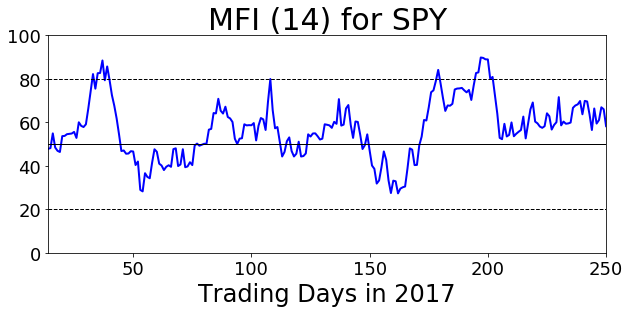

In [46]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(tradedays[len(tradedays)-len(mfi_sd):],mfi_sd,color='blue',lw=2)
ax.plot(tradedays[len(tradedays)-len(mfi_sd):],np.zeros(len(mfi_sd))+50,color='black',lw=1)
ax.plot(tradedays[len(tradedays)-len(mfi_sd):],np.zeros(len(mfi_sd))+20,color='black',lw=1,linestyle='dashed')
ax.plot(tradedays[len(tradedays)-len(mfi_sd):],np.zeros(len(mfi_sd))+80,color='black',lw=1,linestyle='dashed')
ax.set_title('MFI (14) for %s' % ticker,fontsize=30)
ax.set_xlabel('Trading Days in 2017',fontsize=24)
ax.set_ylabel('',fontsize=24)
plt.ylim(0,100)
plt.xlim(np.amin(tradedays[len(tradedays)-len(mfi_sd):]),np.amax(tradedays[len(tradedays)-len(mfi_sd):]))
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.show()

## Negative Volume Index

The Negative Volume Index (NVI) is calculated based on the formula of adding the percent price change to the index on days when volume declines and leaving the index unchanged on days that volume increases.  A signal line is generated that is the exponential moving average of the index.  The nvi function requires the three parameters of closing prices, trading volume and a number of periods for EMA calculation.  The function returns the NVI and the signal.

In [47]:
nvi_sd = nvi(sd_close,sd_volume,50)
nvi_line = nvi_sd[0]
nvi_signal = nvi_sd[1]

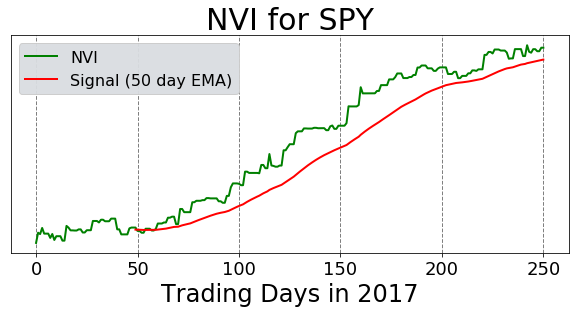

In [48]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(tradedays[len(tradedays)-len(nvi_line):],nvi_line,color='green',lw=2,label="NVI")
ax.plot(tradedays[len(tradedays)-len(nvi_signal):],nvi_signal,color='red',lw=2,label="Signal (50 day EMA)")
ax.set_title('NVI for %s' % ticker,fontsize=30)
ax.set_xlabel('Trading Days in 2017',fontsize=24)
ax.set_ylabel('',fontsize=24)
ax.legend(loc='best', frameon=True, fancybox=True, framealpha=0.95, fontsize=16, facecolor='#D9DDE1')
ax.grid(color='gray', linestyle='--', linewidth=1)
plt.yticks([],[])
plt.xticks(fontsize=18)
plt.show()

## On Balance Volume (OBV)

The On Balance Volume is a running total of in which volume is added to the previous period's volume when price change is positive, and subtracted from previous day's volume when price change is negative.  The obv function calculates the On Balance Volume given an array of closing prices and an array of trading volume.

In [49]:
obv_sd = obv(sd_close,sd_volume)

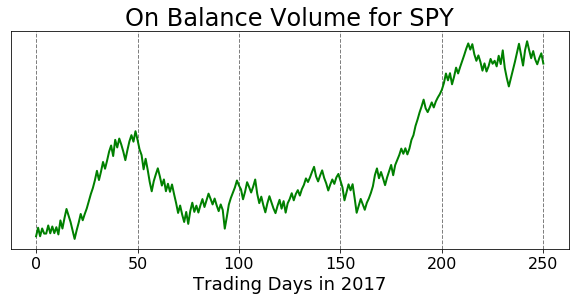

In [50]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(tradedays,obv_sd,color='green',lw=2)
ax.set_title('On Balance Volume for %s' % ticker,fontsize=24)
ax.set_yticks([])
ax.set_xlabel('Trading Days in 2017',fontsize=18)
ax.set_ylabel('',fontsize=18)
ax.grid(color='gray', linestyle='--', linewidth=1)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.show()

## PVO Calculations and Plotting

The percentage volume oscillator is an analog of the PPO that is applied to volume instead of price.  The PVO is the difference between two exponential moving averages relative to the slower moving average.  The pvo function requires four parameters: an array of trading volume, a number of periods for the fast EMA (12 is the standard), a number of periods for the slower moving average (26 is the standard), and a number of periods for the signal calculation (9 is the standard).  The signal is the EMA of the PVO line.

In [51]:
pvo_line_sd = pvo(sd_close,12,26,9)[0]
pvo_signal_sd = pvo(sd_close,12,26,9)[1]
pvo_histogram_sd = pvo_line_sd[len(pvo_line_sd)-len(pvo_signal_sd):]-pvo_signal_sd

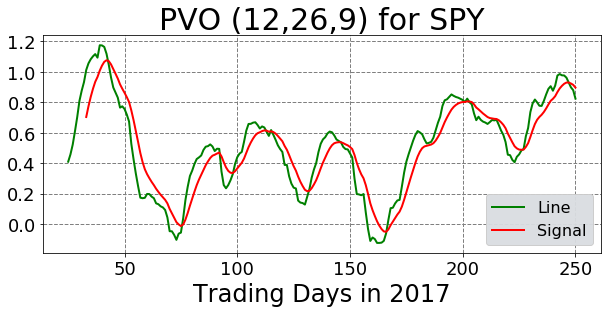

In [52]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(tradedays[len(tradedays)-len(pvo_line_sd):],pvo_line_sd,color='green',lw=2,label="Line")
ax.plot(tradedays[len(tradedays)-len(pvo_signal_sd):],pvo_signal_sd,color='red',lw=2,label="Signal")
ax.set_title('PVO (12,26,9) for %s' % ticker,fontsize=30)
ax.set_xlabel('Trading Days in 2017',fontsize=24)
ax.set_ylabel('',fontsize=24)
ax.legend(loc='best', frameon=True, fancybox=True, framealpha=0.95, fontsize=16, facecolor='#D9DDE1')
ax.grid(color='gray', linestyle='--', linewidth=1)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.show()

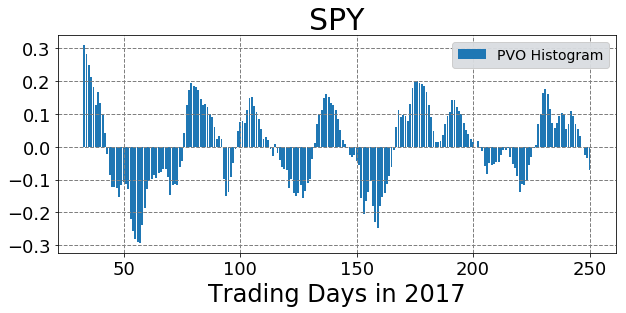

In [53]:
fig, ax = plt.subplots(figsize=(10,4))
ax.bar(tradedays[len(tradedays)-len(pvo_histogram_sd):],pvo_histogram_sd,label="PVO Histogram")
ax.set_title(ticker,fontsize=30)
ax.set_xlabel('Trading Days in 2017',fontsize=24)
ax.set_ylabel('',fontsize=24)
ax.legend(loc='best', frameon=True, fancybox=True, framealpha=0.95, fontsize=14, facecolor='#D9DDE1')
ax.grid(color='gray', linestyle='--', linewidth=1)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.show()

## Pring's Know Sure Thing (KST)

The KST indicator is based on the combined average rates of change in price on four different numbers of periods:

$KST = SMA1(ROC1)+2*SMA1(ROC2)+3*SMA3(ROC3)+4*SMA4(ROC4)$

where "SMA" refers to the simple moving average, and "ROC" is the rate of change in price.  The signal line is a simple moving average of KST.  Since the number of periods for each of the 4 rates of change are adjustable, and the number of periods for each simple moving average is adjustable, the calculation of KST involves a lot of parameters.  The standard values are 10, 15, 20, and 30 periods for calculation of ROC1, ROC2, ROC3, and ROC4, respectively.  Standard vales are 10, 10, 10, 15, and 9 periods for SMA1, SMA2, SMA3, SMA4, and the signal line SMA, respectively.  The kst function returns the KST line and signal line.  The example below shows the calculation based on daily closing prices using the standard parameters.

In [54]:
kst_sd = kst(sd_close,10,15,20,30,10,10,10,15,9)
kst_line = kst_sd[0]
kst_signal = kst_sd[1]

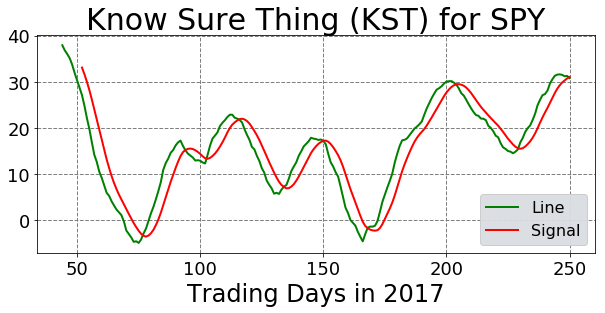

In [55]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(tradedays[len(tradedays)-len(kst_line):],kst_line,color='green',lw=2,label="Line")
ax.plot(tradedays[len(tradedays)-len(kst_signal):],kst_signal,color='red',lw=2,label="Signal")
ax.set_title('Know Sure Thing (KST) for %s' % ticker,fontsize=30)
ax.set_xlabel('Trading Days in 2017',fontsize=24)
ax.set_ylabel('',fontsize=24)
ax.legend(loc='best', frameon=True, fancybox=True, framealpha=0.95, fontsize=16, facecolor='#D9DDE1')
ax.grid(color='gray', linestyle='--', linewidth=1)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.show()